# ERBB Signaling Network Analysis

This notebook serves as the main analysis tool for the ERBB signaling network. It integrates various analyses, including stable state identification, drug target prediction, and biomarker analysis. The goal is to understand the dynamics of the ERBB signaling pathway and its implications in breast cancer.

Model saved to ../data/models/ERBB_model.boon
Analyzing stable states...
Found 3 stable states


,0,1,2
0,True,False,True
1,False,False,True
2,True,False,True
3,True,False,True
4,False,False,False



Identifying potential drug targets...
Top 5 drug targets:
- AKT1: Score = 14
- ER_alpha: Score = 12
- ERBB2: Score = 10
- c_MYC: Score = 10
- ERBB1: Score = 8

Analyzing biomarkers...
Top 5 biomarkers:
- p21: Score = 60.80
- p27: Score = 60.80
- AKT1: Score = 42.80
- ER_alpha: Score = 42.40
- ERBB2: Score = 42.00
Figure saved to ../results/figures/stable_states_activity.png


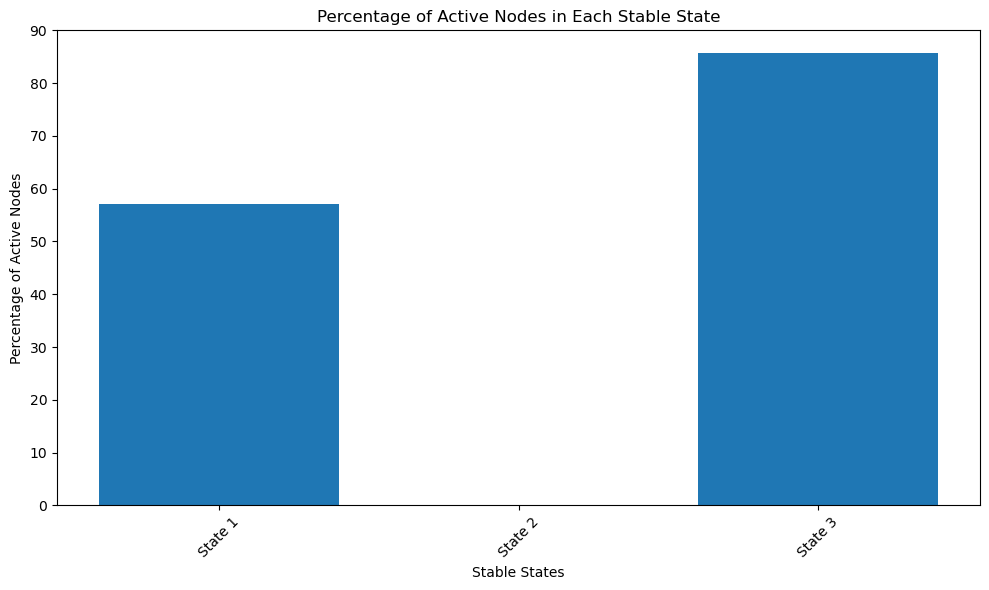

Figure saved to ../results/figures/drug_targets.png


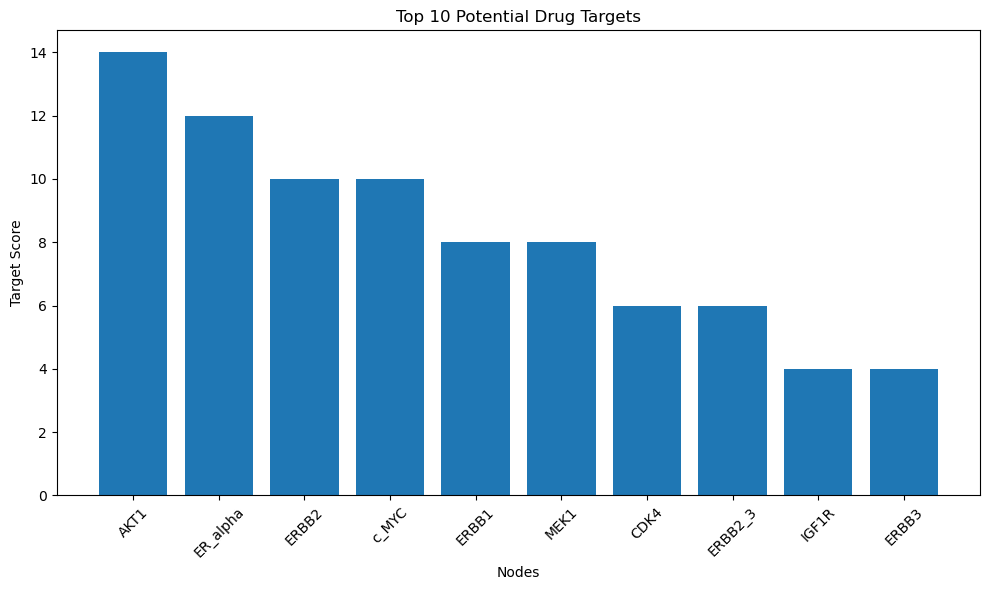

Figure saved to ../results/figures/biomarkers.png


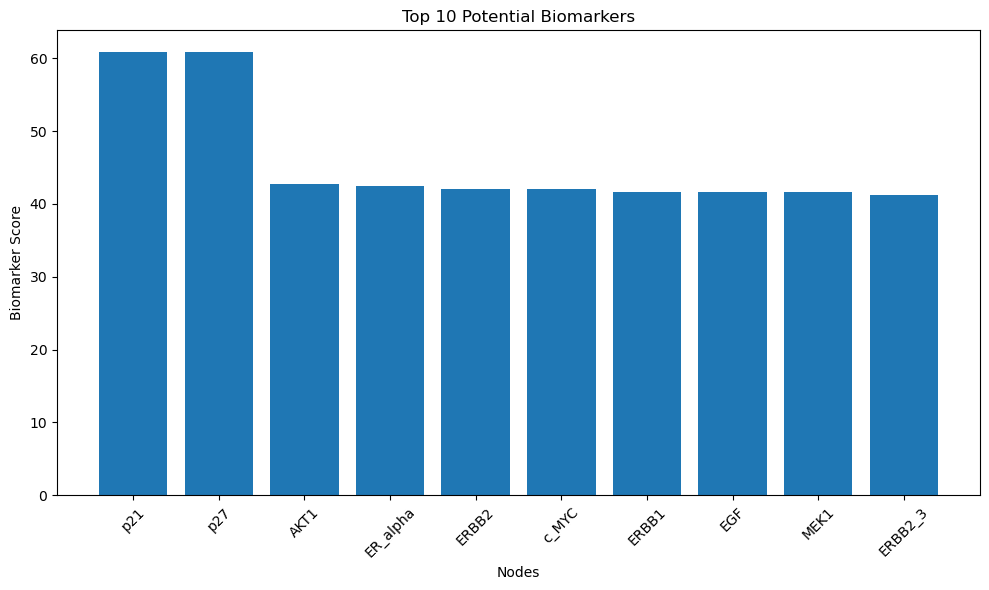

Results saved to ../results/stable_states.csv
Results saved to ../results/drug_targets.csv
Results saved to ../results/biomarkers.csv

Analysis complete! All results and visualizations have been saved.


In [22]:
import sys
import os
sys.path.append(os.path.abspath('..'))  # Add parent directory to path

# Import our modules
import pandas as pd
import matplotlib.pyplot as plt
from src.models.ERBB_Boolean import model
from src.analysis.stable_states import analyze_stable_states
from src.analysis.drug_targets import identify_drug_targets
from src.analysis.biomarker_analysis import analyze_biomarkers
from src.utils.io_utils import save_model, load_model, save_results, save_visualization

# Save the ERBB model first
save_model(model, '../data/models/ERBB_model.boon')

# Load the ERBB model (demonstration of loading)
model = load_model('../data/models/ERBB_model.boon')

# 1. Analyze stable states
print("Analyzing stable states...")
stable_states_results = analyze_stable_states(model)
print(f"Found {stable_states_results['count']} stable states")

# Display first 5 rows of the stable states dataframe
display(stable_states_results['dataframe'].head())

# 2. Identify potential drug targets
print("\nIdentifying potential drug targets...")
drug_targets = identify_drug_targets(model)
print("Top 5 drug targets:")
for target in drug_targets[:5]:
    print(f"- {target['node']}: Score = {target['target_score']}")

# 3. Analyze biomarkers
print("\nAnalyzing biomarkers...")
biomarker_results = analyze_biomarkers(model)
print("Top 5 biomarkers:")
for marker in biomarker_results['all_biomarkers'][:5]:
    print(f"- {marker['node']}: Score = {marker['biomarker_score']:.2f}")

# 4. Visualize results
# 4.1 Visualize stable states activity
plt.figure(figsize=(10, 6))
active_percentages = [state['active_percentage'] for state in stable_states_results['states']]
state_names = [f"State {i+1}" for i in range(len(active_percentages))]
plt.bar(state_names, active_percentages)
plt.title('Percentage of Active Nodes in Each Stable State')
plt.xlabel('Stable States')
plt.ylabel('Percentage of Active Nodes')
plt.xticks(rotation=45)
plt.tight_layout()
save_visualization(plt.gcf(), '../results/figures/stable_states_activity.png')
plt.show()

# 4.2 Visualize drug target scores
plt.figure(figsize=(10, 6))
top_targets = drug_targets[:10]
target_names = [target['node'] for target in top_targets]
target_scores = [target['target_score'] for target in top_targets]
plt.bar(target_names, target_scores)
plt.title('Top 10 Potential Drug Targets')
plt.xlabel('Nodes')
plt.ylabel('Target Score')
plt.xticks(rotation=45)
plt.tight_layout()
save_visualization(plt.gcf(), '../results/figures/drug_targets.png')
plt.show()

# 4.3 Visualize biomarker scores
plt.figure(figsize=(10, 6))
top_biomarkers = biomarker_results['all_biomarkers'][:10]
biomarker_names = [marker['node'] for marker in top_biomarkers]
biomarker_scores = [marker['biomarker_score'] for marker in top_biomarkers]
plt.bar(biomarker_names, biomarker_scores)
plt.title('Top 10 Potential Biomarkers')
plt.xlabel('Nodes')
plt.ylabel('Biomarker Score')
plt.xticks(rotation=45)
plt.tight_layout()
save_visualization(plt.gcf(), '../results/figures/biomarkers.png')
plt.show()

# Save all results
save_results(pd.DataFrame(stable_states_results['states']), '../results/stable_states.csv')
save_results(pd.DataFrame(drug_targets), '../results/drug_targets.csv')
save_results(pd.DataFrame(biomarker_results['all_biomarkers']), '../results/biomarkers.csv')

print("\nAnalysis complete! All results and visualizations have been saved.")

## Calculating Attractors in The ERBB Boolean Network

In [23]:
# Add import for the new attractors module
from src.analysis.attractors import analyze_attractors, visualize_attractor_basin, print_attractor_details

# After your existing stable states analysis, add this section:
print("\nAnalyzing all attractors (including cycles)...")
attractors_results = analyze_attractors(model)
print_attractor_details(attractors_results)

# Visualize attractor comparison
plt.figure(figsize=(10, 6))
all_attractors = attractors_results['all_attractors']
attractor_ids = [f"A{a['id']} ({a['type']})" for a in all_attractors]
activity_percentages = [a['active_percentage'] for a in all_attractors]
attractor_lengths = [a['length'] for a in all_attractors]

# Plot activation percentages
plt.subplot(1, 2, 1)
plt.bar(attractor_ids, activity_percentages, color=['green' if a['length']==1 else 'orange' for a in all_attractors])
plt.title('Node Activity in Each Attractor')
plt.ylabel('% Active Nodes')
plt.xticks(rotation=45)

# Plot attractor lengths
plt.subplot(1, 2, 2)
plt.bar(attractor_ids, attractor_lengths, color=['green' if a['length']==1 else 'orange' for a in all_attractors])
plt.title('Attractor Lengths')
plt.ylabel('# States')
plt.xticks(rotation=45)

plt.tight_layout()
save_visualization(plt.gcf(), '../results/figures/attractors_comparison.png')
plt.show()

# Visualize the basin of attraction for the first attractor
if len(attractors_results['all_attractors']) > 0:
    print("\nVisualizing basin of attraction for the first attractor...")
    basin_fig = visualize_attractor_basin(model, 1, max_states=50)
    save_visualization(basin_fig, '../results/figures/attractor1_basin.png')
    plt.show()


Analyzing all attractors (including cycles)...
BooN model >> Transition [912774/44040192]      

KeyboardInterrupt: 

## Knockout Analysis


Performing single-gene knockout analysis...

Knockout analysis results:


,knockout,stable_states_count,cell_cycle_activity
0,None (Wild-type),3,66.666667
1,ERBB1,3,66.666667
2,ERBB2,3,66.666667
3,ERBB3,3,66.666667
4,c_MYC,3,44.444444
5,AKT1,3,66.666667
6,MEK1,3,66.666667
7,ER_alpha,3,66.666667
8,IGF1R,2,50.000000


Figure saved to ../results/figures/knockout_effects.png


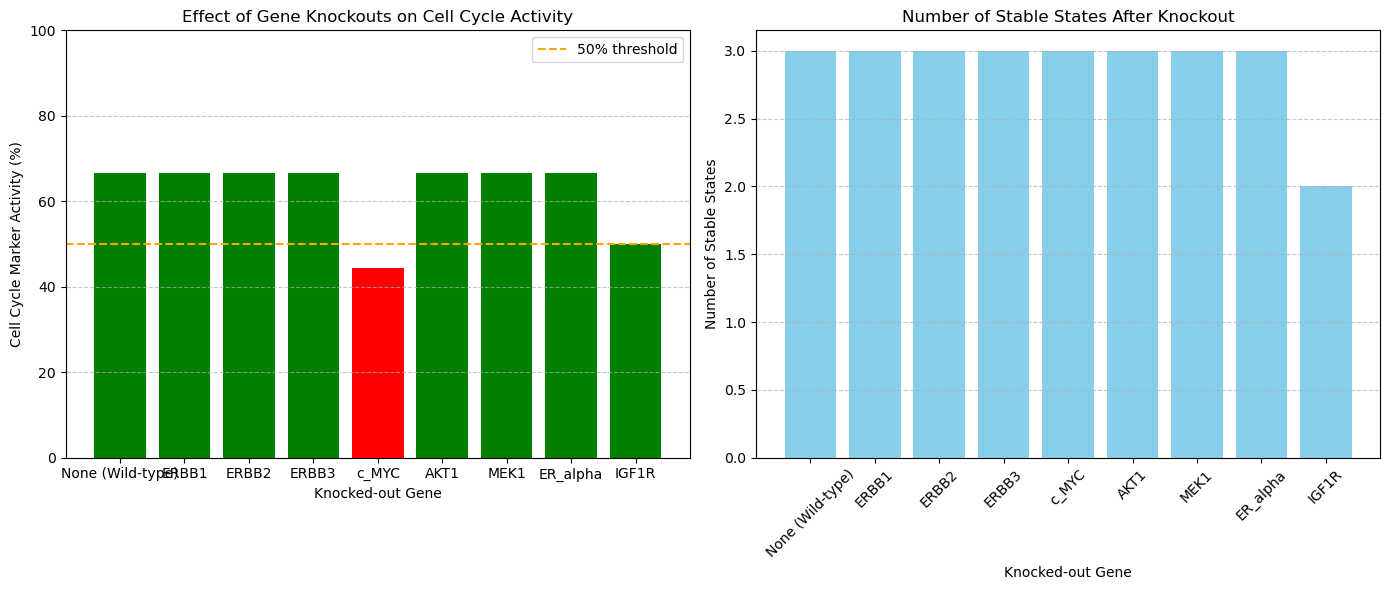


Detailed analysis of key knockouts:

=== ERBB2 Knockout ===
Cell cycle marker activity: 66.7%
The ERBB2 knockout doesn't completely block cell cycle progression.

=== c_MYC Knockout ===
Cell cycle marker activity: 44.4%
The c_MYC knockout partially impairs cell cycle progression.


In [ ]:
# Add import for the knockout analysis
from src.analysis.knockout_analysis import analyze_knockouts, visualize_knockout_effects

# Define genes to knockout
genes_to_knockout = ['ERBB1', 'ERBB2', 'ERBB3', 'c_MYC', 'AKT1', 'MEK1', 'ER_alpha', 'IGF1R']

# Define cell cycle markers (genes that indicate cell cycle progression)
cell_cycle_markers = ['CDK2', 'CDK4', 'CDK6', 'pRB', 'Cyclin_D1', 'Cyclin_E1']

print("\nPerforming single-gene knockout analysis...")
knockout_results = analyze_knockouts(model, genes_to_knockout, cell_cycle_markers)

# Display results as a table
print("\nKnockout analysis results:")
display(knockout_results['dataframe'])

# Visualize the effects of knockouts
knockout_fig = visualize_knockout_effects(knockout_results)
save_visualization(knockout_fig, '../results/figures/knockout_effects.png')
plt.show()

# Detailed analysis of specific knockouts
print("\nDetailed analysis of key knockouts:")

# ERBB2 knockout analysis
print("\n=== ERBB2 Knockout ===")
erbb2_result = knockout_results['dataframe'][knockout_results['dataframe']['knockout'] == 'ERBB2']
if not erbb2_result.empty:
    cell_cycle_activity = erbb2_result['cell_cycle_activity'].values[0]
    print(f"Cell cycle marker activity: {cell_cycle_activity:.1f}%")
    if cell_cycle_activity < 50:
        print("The ERBB2 knockout significantly impairs cell cycle progression.")
    else:
        print("The ERBB2 knockout doesn't completely block cell cycle progression.")

# c_MYC knockout analysis
print("\n=== c_MYC Knockout ===")
cmyc_result = knockout_results['dataframe'][knockout_results['dataframe']['knockout'] == 'c_MYC']
if not cmyc_result.empty:
    cell_cycle_activity = cmyc_result['cell_cycle_activity'].values[0]
    print(f"Cell cycle marker activity: {cell_cycle_activity:.1f}%")
    if cell_cycle_activity < 30:
        print("The c_MYC knockout strongly blocks cell cycle progression, supporting Sahin's findings.")
    elif cell_cycle_activity < 50:
        print("The c_MYC knockout partially impairs cell cycle progression.")
    else:
        print("The c_MYC knockout has limited effect on cell cycle progression in this model.")

Raw top knockouts (before filtering): ['c_MYC', 'IGF1R', 'None (Wild-type)']
Filtered top knockouts: ['c_MYC', 'IGF1R']

Detailed analysis of knockout effects on network dynamics...
Raw top knockouts (before filtering): ['c_MYC', 'IGF1R', 'None (Wild-type)']
Filtered top knockouts: ['c_MYC', 'IGF1R', 'None (Wild-type)']
Analyzing wild-type model...
Analyzing c_MYC knockout...
Successfully created knockout for c_MYC
Analyzing IGF1R knockout...
Successfully created knockout for IGF1R
Analyzing None (Wild-type) knockout...
Skipping invalid knockout: 'None (Wild-type)'


,knockout,CDK2,CDK4,CDK6,pRB,Cyclin_D1,Cyclin_E1,p21,p27
0,Wild-type,66.666667,66.666667,66.666667,66.666667,66.666667,66.666667,0.0,0.0
1,c_MYC,0.000000,66.666667,66.666667,66.666667,66.666667,0.000000,0.0,0.0
2,IGF1R,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,0.0,0.0
3,None (Wild-type),66.666667,66.666667,66.666667,66.666667,66.666667,66.666667,0.0,0.0


Figure saved to ../results/figures/detailed_knockout_effects.png



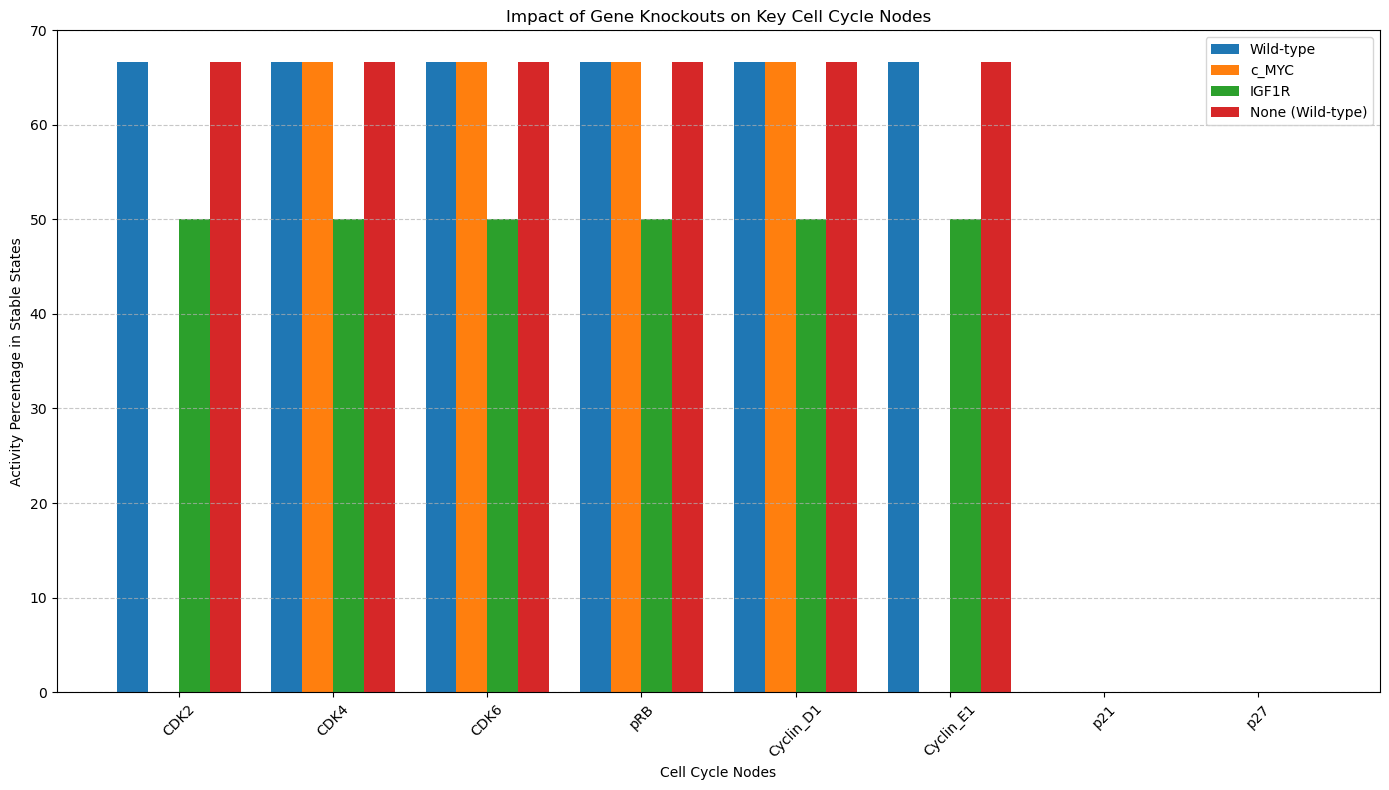

In [25]:
from sympy import symbols
import numpy as np
import copy
import sys
from src.analysis.knockout_analysis import analyze_knockouts, visualize_knockout_effects

# Implement a better filter for the top knockouts
top_knockouts_raw = knockout_results['dataframe'].sort_values('cell_cycle_activity').head(3)['knockout'].tolist()
print(f"Raw top knockouts (before filtering): {top_knockouts_raw}")

# Improved filtering logic to exclude invalid gene names
top_knockouts = []
for gene in top_knockouts_raw:
    # Exclude None, 'Wild-type', 'None (Wild-type)' or any string containing 'Wild-type'
    if (gene is not None and 
        isinstance(gene, str) and 
        'Wild-type' not in gene):
        top_knockouts.append(gene)

print(f"Filtered top knockouts: {top_knockouts}")

# Implement a safer way to perform knockouts and analyze states
def safe_knockout(model, gene_name):
    """Create a knockout model safely"""
    ko_model = copy.deepcopy(model)
    
    # Better validation of gene name
    if not gene_name or not isinstance(gene_name, str) or 'Wild-type' in gene_name:
        print(f"Skipping invalid knockout: '{gene_name}'")
        return ko_model
        
    # Try-except block to catch any errors
    try:
        gene_symbol = symbols(gene_name)
        if gene_symbol in ko_model.desc:
            ko_model.desc[gene_symbol] = False
            print(f"Successfully created knockout for {gene_name}")
        else:
            print(f"Warning: Gene {gene_name} not found in model")
    except Exception as e:
        print(f"Error creating knockout for {gene_name}: {str(e)}")
    
    return ko_model

def analyze_node_activity(model, nodes):
    """Safely analyze node activity in a model's states"""
    try:
        # Try to get stable states
        states = model.stable_states
        if not states:
            print("Warning: No stable states found")
            return {node: 0 for node in nodes}
    except Exception as e:
        print(f"Error computing stable states: {str(e)}")
        # Return zeros for all nodes if computation fails
        return {node: 0 for node in nodes}
    
    # Calculate node activities
    activities = {}
    for node in nodes:
        try:
            node_symbol = symbols(node)
            active_count = sum(1 for state in states if state.get(node_symbol, False))
            activity_percentage = (active_count / len(states) * 100) if states else 0
            activities[node] = activity_percentage
        except Exception as e:
            print(f"Error calculating activity for {node}: {str(e)}")
            activities[node] = 0
    
    return activities

# Perform detailed analysis of knockouts
print("\nDetailed analysis of knockout effects on network dynamics...")

# Get the top knockouts, ensuring we only include valid gene names
# Print the original list to help debug
top_knockouts_raw = knockout_results['dataframe'].sort_values('cell_cycle_activity').head(3)['knockout'].tolist()
print(f"Raw top knockouts (before filtering): {top_knockouts_raw}")

# Filter out None and 'Wild-type' values explicitly
top_knockouts = []
for gene in top_knockouts_raw:
    if gene is not None and gene != 'Wild-type' and isinstance(gene, str):
        top_knockouts.append(gene)

print(f"Filtered top knockouts: {top_knockouts}")

# Define important cell cycle nodes to analyze
important_nodes = ['CDK2', 'CDK4', 'CDK6', 'pRB', 'Cyclin_D1', 'Cyclin_E1', 'p21', 'p27']
detailed_results = []

# First analyze wild-type
print("Analyzing wild-type model...")
wt_activities = analyze_node_activity(model, important_nodes)
detailed_results.append({'knockout': 'Wild-type', **wt_activities})

# Then analyze each top knockout, only if we have valid knockouts
if not top_knockouts:
    print("Warning: No valid knockout genes found for analysis")
else:
    for ko_gene in top_knockouts:
        print(f"Analyzing {ko_gene} knockout...")
        ko_model = safe_knockout(model, ko_gene)
        ko_activities = analyze_node_activity(ko_model, important_nodes)
        detailed_results.append({'knockout': ko_gene, **ko_activities})

# Display detailed results
detailed_df = pd.DataFrame(detailed_results)
display(detailed_df)

# Visualize changes in node activity
plt.figure(figsize=(14, 8))
width = 0.2
x = np.arange(len(important_nodes))

for i, row in enumerate(detailed_results):
    offset = width * (i - len(detailed_results)/2 + 0.5)
    plt.bar(x + offset, [row[node] for node in important_nodes], width, 
            label=row['knockout'])

plt.xlabel('Cell Cycle Nodes')
plt.ylabel('Activity Percentage in Stable States')
plt.title('Impact of Gene Knockouts on Key Cell Cycle Nodes')
plt.xticks(x, important_nodes, rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
save_visualization(plt.gcf(), '../results/figures/detailed_knockout_effects.png')
plt.show()

## Exploring the Cell Division Phenotype


Analyzing cell division phenotype in knockouts...


,knockout,total_states,division_states,division_percentage
0,Wild-type,3,2,66.666667
1,ERBB1,3,2,66.666667
2,ERBB2,3,2,66.666667
3,ERBB3,3,2,66.666667
4,c_MYC,3,2,66.666667
5,AKT1,3,2,66.666667
6,MEK1,3,2,66.666667
7,ER_alpha,3,2,66.666667
8,IGF1R,2,1,50.000000


Figure saved to ../results/figures/cell_division_phenotype.png


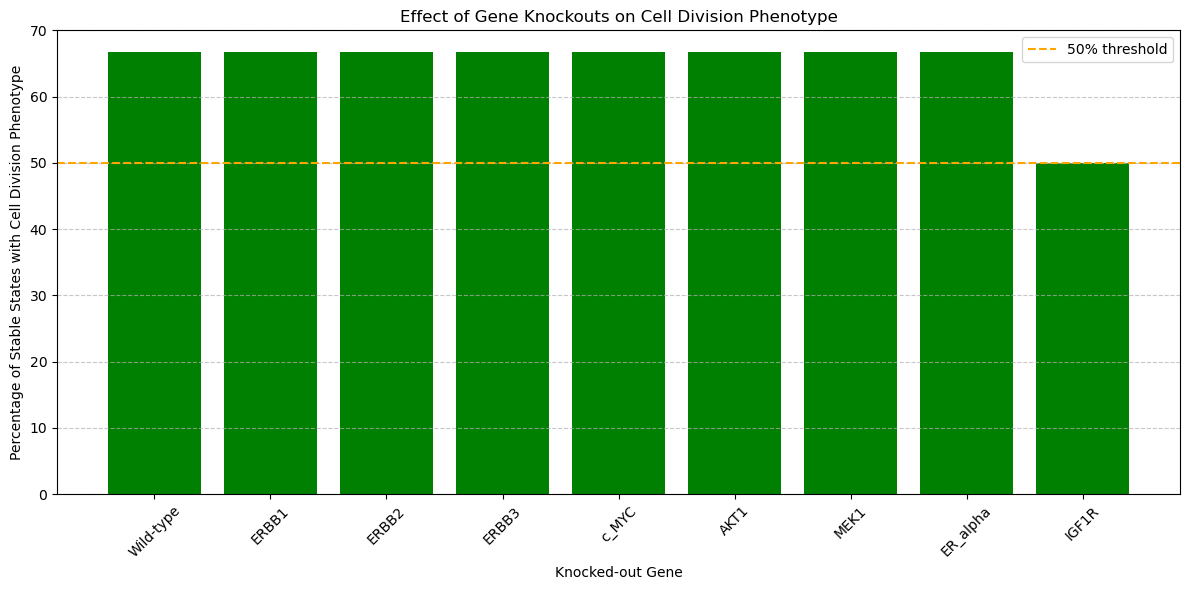

In [26]:
# Define cell division phenotype based on key markers
def determine_cell_division_phenotype(state, threshold=0.6):
    """Determine if a state represents a cell division phenotype"""
    key_markers = ['CDK2', 'CDK4', 'pRB']
    marker_symbols = [symbols(m) for m in key_markers]
    active_count = sum(1 for m in marker_symbols if state.get(m, False))
    return (active_count / len(key_markers)) >= threshold

# Analyze cell division phenotype in wild-type vs knockouts
print("\nAnalyzing cell division phenotype in knockouts...")
phenotype_results = []

# Wild-type analysis
wt_states = model.stable_states
wt_division_states = sum(1 for state in wt_states if determine_cell_division_phenotype(state))
wt_result = {
    'knockout': 'Wild-type',
    'total_states': len(wt_states),
    'division_states': wt_division_states,
    'division_percentage': (wt_division_states / len(wt_states) * 100) if wt_states else 0
}
phenotype_results.append(wt_result)

# Knockout analysis
for gene in genes_to_knockout:
    ko_model = perform_knockout(model, gene)
    ko_states = ko_model.stable_states
    ko_division_states = sum(1 for state in ko_states if determine_cell_division_phenotype(state))
    
    ko_result = {
        'knockout': gene,
        'total_states': len(ko_states),
        'division_states': ko_division_states,
        'division_percentage': (ko_division_states / len(ko_states) * 100) if ko_states else 0
    }
    phenotype_results.append(ko_result)

# Display results
phenotype_df = pd.DataFrame(phenotype_results)
display(phenotype_df)

# Visualize cell division phenotype results
plt.figure(figsize=(12, 6))
plt.bar(phenotype_df['knockout'], phenotype_df['division_percentage'], 
        color=['green' if x >= 50 else 'red' for x in phenotype_df['division_percentage']])
plt.axhline(y=50, color='orange', linestyle='--', label='50% threshold')
plt.xlabel('Knocked-out Gene')
plt.ylabel('Percentage of Stable States with Cell Division Phenotype')
plt.title('Effect of Gene Knockouts on Cell Division Phenotype')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
save_visualization(plt.gcf(), '../results/figures/cell_division_phenotype.png')
plt.show()

## Comparing Specific Knockouts (ERBB2, EGFR, and c-MYC)


Comparing key knockouts mentioned in Sahin et al...


,knockout,stable_states,s_phase_entry_percent,CDK2,CDK4,CDK6,pRB,Cyclin_D1,Cyclin_E1,p21,p27
0,Wild-type,3,66.666667,66.666667,66.666667,66.666667,66.666667,66.666667,66.666667,0.0,0.0
1,ERBB1,3,66.666667,66.666667,66.666667,66.666667,66.666667,66.666667,66.666667,0.0,0.0
2,ERBB2,3,66.666667,66.666667,66.666667,66.666667,66.666667,66.666667,66.666667,0.0,0.0
3,c_MYC,3,0.000000,0.000000,66.666667,66.666667,66.666667,66.666667,0.000000,0.0,0.0


Figure saved to ../results/figures/s_phase_entry_comparison.png


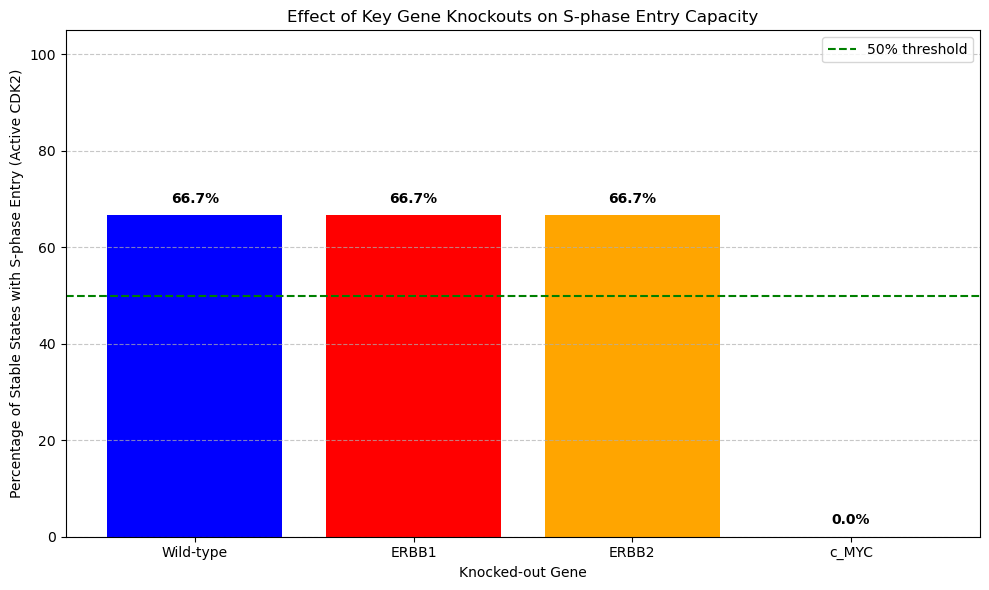

In [27]:
# Focus on specific knockouts: ERBB2 (HER2), ERBB1 (EGFR), and c-MYC
special_knockouts = ['ERBB1', 'ERBB2', 'c_MYC']
special_ko_results = []

print("\nComparing key knockouts mentioned in Sahin et al...")

for gene in special_knockouts:
    ko_model = perform_knockout(model, gene)
    ko_states = ko_model.stable_states
    
    # Check if we have any active CDK2, which indicates S-phase entry
    cdk2_symbol = symbols('CDK2')
    s_phase_states = sum(1 for state in ko_states if state.get(cdk2_symbol, False))
    s_phase_percentage = (s_phase_states / len(ko_states) * 100) if ko_states else 0
    
    # Calculate activity of key cell cycle regulatory genes
    key_genes = ['CDK2', 'CDK4', 'CDK6', 'pRB', 'Cyclin_D1', 'Cyclin_E1', 'p21', 'p27']
    gene_activities = {}
    
    for kg in key_genes:
        kg_symbol = symbols(kg)
        active_states = sum(1 for state in ko_states if state.get(kg_symbol, False))
        gene_activities[kg] = (active_states / len(ko_states) * 100) if ko_states else 0
    
    result = {
        'knockout': gene,
        'stable_states': len(ko_states),
        's_phase_entry_percent': s_phase_percentage,
        **gene_activities
    }
    special_ko_results.append(result)

# Add wild-type for comparison
wt_states = model.stable_states
cdk2_symbol = symbols('CDK2')
wt_s_phase_states = sum(1 for state in wt_states if state.get(cdk2_symbol, False))
wt_s_phase_percentage = (wt_s_phase_states / len(wt_states) * 100) if wt_states else 0

wt_gene_activities = {}
for kg in key_genes:
    kg_symbol = symbols(kg)
    active_states = sum(1 for state in wt_states if state.get(kg_symbol, False))
    wt_gene_activities[kg] = (active_states / len(wt_states) * 100) if wt_states else 0

wt_result = {
    'knockout': 'Wild-type',
    'stable_states': len(wt_states),
    's_phase_entry_percent': wt_s_phase_percentage,
    **wt_gene_activities
}
special_ko_results.insert(0, wt_result)

# Display results
special_ko_df = pd.DataFrame(special_ko_results)
display(special_ko_df)

# Create a focused visualization of S-phase entry capacity
plt.figure(figsize=(10, 6))
bars = plt.bar(special_ko_df['knockout'], special_ko_df['s_phase_entry_percent'],
              color=['blue', 'red', 'orange', 'purple'])

# Add data labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 2,
             f'{height:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.axhline(y=50, color='green', linestyle='--', label='50% threshold')
plt.xlabel('Knocked-out Gene')
plt.ylabel('Percentage of Stable States with S-phase Entry (Active CDK2)')
plt.title('Effect of Key Gene Knockouts on S-phase Entry Capacity')
plt.ylim(0, 105)  # Set y-axis limit
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
save_visualization(plt.gcf(), '../results/figures/s_phase_entry_comparison.png')
plt.show()